### Import Dataset


In [1]:
import pandas as pd

# Define monitoring time frames
monitoring_time = {
    "New_Nozzle_set1": ("4:49:00 pm", "4:53:59 pm"),
    "New_Nozzle_set2": ("4:59:00 pm", "5:03:59 pm"),
    "New_Nozzle_set3": ("5:10:00 pm", "5:14:59 pm"),
    "Bad_Nozzle_set1": ("4:28:00 pm", "4:32:59 pm"),
    "Bad_Nozzle_set2": ("11:37:00 am", "11:41:59 am"),
    "Bad_Nozzle_set3": ("11:45:00 am", "11:49:59 am"),
    "Worst_Nozzle_set1": ("6:10:00 pm", "6:14:59 pm"),
    "Worst_Nozzle_set2": ("10:59:00 am", "11:03:59 am"),
    "Worst_Nozzle_set3": ("11:13:00 am", "11:17:59 am"),
}

# CSV filenames
g_csv_name = ["New_Nozzle_set1", "New_Nozzle_set2", "New_Nozzle_set3"]
b_csv_name = ["Bad_Nozzle_set1", "Bad_Nozzle_set2", "Bad_Nozzle_set3"]
w_csv_name = ["Worst_Nozzle_set1", "Worst_Nozzle_set2", "Worst_Nozzle_set3"]

# Read CSVs into DataFrames
def load_and_filter_csv(file_name, start_time, end_time):
    df = pd.read_csv(f"../data/{file_name}.csv")
    df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p')
    start_time = pd.to_datetime(start_time, format='%I:%M:%S %p')
    end_time = pd.to_datetime(end_time, format='%I:%M:%S %p')
    return df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

# Filter and concatenate good data
filtered_g_df = [
    load_and_filter_csv(g_csv_name[0], *monitoring_time['New_Nozzle_set1']),
    load_and_filter_csv(g_csv_name[1], *monitoring_time['New_Nozzle_set2']),
    load_and_filter_csv(g_csv_name[2], *monitoring_time['New_Nozzle_set3']),
]
g_df = pd.concat(filtered_g_df, ignore_index=True)
g_df['Nozzle_Condition'] = 1

# Filter and concatenate bad data
filtered_b_df = [
    load_and_filter_csv(b_csv_name[0], *monitoring_time['Bad_Nozzle_set1']),
    load_and_filter_csv(b_csv_name[1], *monitoring_time['Bad_Nozzle_set2']),
    load_and_filter_csv(b_csv_name[2], *monitoring_time['Bad_Nozzle_set3']),
]
b_df = pd.concat(filtered_b_df, ignore_index=True)
b_df['Nozzle_Condition'] = 0.5

# Filter and concatenate bad data
filtered_w_df = [
    load_and_filter_csv(w_csv_name[0], *monitoring_time['Worst_Nozzle_set1']),
    load_and_filter_csv(w_csv_name[1], *monitoring_time['Worst_Nozzle_set2']),
    load_and_filter_csv(w_csv_name[2], *monitoring_time['Worst_Nozzle_set3']),
]
w_df = pd.concat(filtered_w_df, ignore_index=True)
w_df['Nozzle_Condition'] = 0



In [2]:
print(g_df.shape)
g_df.head()

(900, 17)


,Date,Time,ms,Data_Type,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure,Nozzle_Condition
0,5/12/2024,1900-01-01 16:49:00,0,Double[12],0,0,0,1000,4.995,1797,301.9,0,62.26,62.61,5.187,0.002,1
1,5/12/2024,1900-01-01 16:49:01,0,Double[12],0,0,0,1000,4.995,1797,299.4,0,62.26,62.61,5.187,0.002,1
2,5/12/2024,1900-01-01 16:49:02,0,Double[12],0,0,0,1000,4.995,1797,300.4,0,62.26,62.61,5.187,0.002,1
3,5/12/2024,1900-01-01 16:49:03,0,Double[12],0,0,0,1000,4.995,1797,298.3,0,62.26,62.61,5.187,0.002,1
4,5/12/2024,1900-01-01 16:49:04,0,Double[12],0,0,0,1000,4.993,1797,298.6,0,62.26,62.61,5.187,0.002,1


In [3]:
print(b_df.shape)
b_df.head()

(900, 17)


,Date,Time,ms,Data_Type,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure,Nozzle_Condition
0,4/12/2024,1900-01-01 16:28:00,0,Double[12],-509.83,-2213.82,1278.23,1000,4.993,1741,299.8,0,62.26,62.64,5.175,0.002,0.5
1,4/12/2024,1900-01-01 16:28:01,0,Double[12],-509.83,-2213.82,1278.23,1000,4.993,1748,299.8,0,62.26,62.64,5.175,0.002,0.5
2,4/12/2024,1900-01-01 16:28:02,0,Double[12],-509.83,-2213.82,1278.23,1000,4.995,1749,301.8,0,62.26,62.64,5.175,0.002,0.5
3,4/12/2024,1900-01-01 16:28:03,0,Double[12],-509.83,-2213.82,1278.23,1000,4.995,1753,299.8,0,62.26,62.64,5.175,0.002,0.5
4,4/12/2024,1900-01-01 16:28:04,0,Double[12],-509.83,-2213.82,1278.23,1000,4.995,1760,297.5,0,62.26,62.64,5.175,0.002,0.5


In [4]:
print(w_df.shape)
w_df.head()

(900, 17)


,Date,Time,ms,Data_Type,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure,Nozzle_Condition
0,4/12/2024,1900-01-01 18:10:00,0,Double[12],-509.83,-2213.82,1278.23,1000,4.998,1741,300.6,0,62.26,62.61,5.182,0.002,0
1,4/12/2024,1900-01-01 18:10:01,0,Double[12],-509.83,-2213.82,1278.23,1000,4.998,1737,299.4,0,62.26,62.61,5.182,0.002,0
2,4/12/2024,1900-01-01 18:10:02,0,Double[12],-509.83,-2213.82,1278.23,1000,4.998,1737,297.4,0,62.26,62.61,5.182,0.002,0
3,4/12/2024,1900-01-01 18:10:03,0,Double[12],-509.83,-2213.82,1278.23,1000,4.995,1741,297.4,0,62.26,62.61,5.182,0.002,0
4,4/12/2024,1900-01-01 18:10:04,0,Double[12],-509.83,-2213.82,1278.23,1000,4.995,1736,298.7,0,62.26,62.60,5.182,0.002,0


In [5]:
df = pd.concat([g_df, b_df, w_df], ignore_index=True)
print(df.shape)
df.head()


(2700, 17)


,Date,Time,ms,Data_Type,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure,Nozzle_Condition
0,5/12/2024,1900-01-01 16:49:00,0,Double[12],0.0,0.0,0.0,1000,4.995,1797,301.9,0,62.26,62.61,5.187,0.002,1.0
1,5/12/2024,1900-01-01 16:49:01,0,Double[12],0.0,0.0,0.0,1000,4.995,1797,299.4,0,62.26,62.61,5.187,0.002,1.0
2,5/12/2024,1900-01-01 16:49:02,0,Double[12],0.0,0.0,0.0,1000,4.995,1797,300.4,0,62.26,62.61,5.187,0.002,1.0
3,5/12/2024,1900-01-01 16:49:03,0,Double[12],0.0,0.0,0.0,1000,4.995,1797,298.3,0,62.26,62.61,5.187,0.002,1.0
4,5/12/2024,1900-01-01 16:49:04,0,Double[12],0.0,0.0,0.0,1000,4.993,1797,298.6,0,62.26,62.61,5.187,0.002,1.0


### Exploratory Data Analysis (EDA)

Correlation Matrix

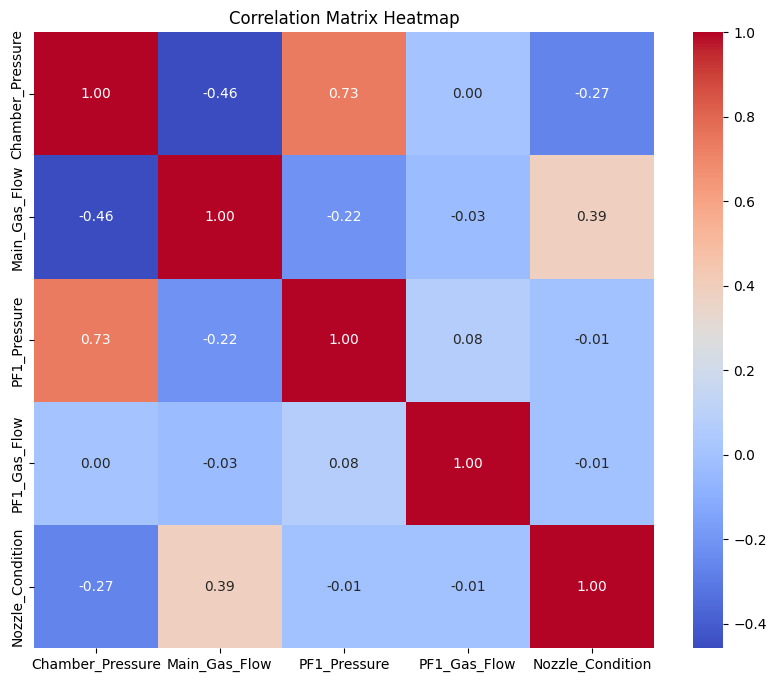

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with all the Process Parameter along with the Condition of the Nozzle
pros_param = ["Chamber_Pressure", "Main_Gas_Flow", "PF1_Pressure", "PF1_Gas_Flow", "Nozzle_Condition"]
pros_param_df = df[pros_param]

# Compute the covariance matrix
corr_matrix = pros_param_df.corr(method='pearson')

# Visualization (Optional)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
# plt.savefig(f"../graphs/Correlaton_Matrix.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


Box-and-Whiskers Plot

C:\Users\yongz\AppData\Local\Temp\ipykernel_28592\4044915980.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Nozzle_Condition", y=param, data=df, ax=ax, order=[0, 0.5, 1], palette=['lightcoral', 'yellow', 'lightgreen'])
C:\Users\yongz\AppData\Local\Temp\ipykernel_28592\4044915980.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Nozzle_Condition", y=param, data=df, ax=ax, order=[0, 0.5, 1], palette=['lightcoral', 'yellow', 'lightgreen'])
C:\Users\yongz\AppData\Local\Temp\ipykernel_28592\4044915980.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same eff

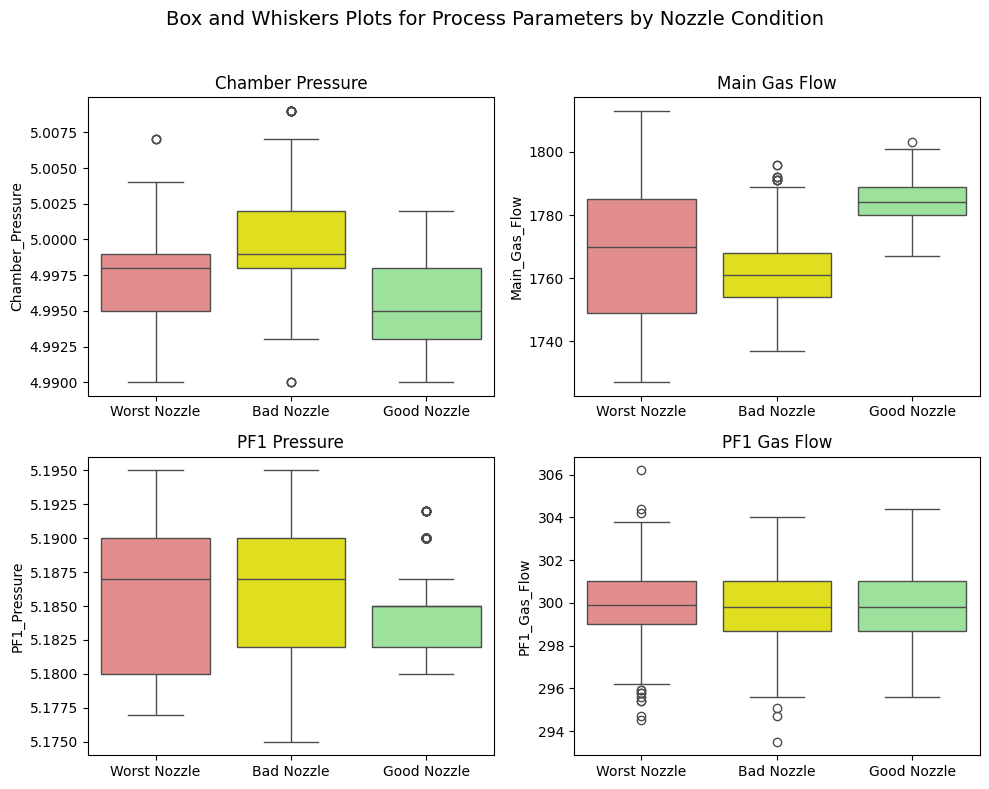

In [7]:
# Set up the figure and axes for 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Box and Whiskers Plots for Process Parameters by Nozzle Condition", fontsize=14)

titles = ["Chamber Pressure", "Main Gas Flow", "PF1 Pressure", "PF1 Gas Flow"]

# Plot each parameter in a subplot
for ax, param, title in zip(axes.flatten(), pros_param, titles):
    sns.boxplot(x="Nozzle_Condition", y=param, data=df, ax=ax, order=[0, 0.5, 1], palette=['lightcoral', 'yellow', 'lightgreen'])
    
    # Set custom x-axis labels
    ax.set_title(title)
    ax.set_xticks([0, 1, 2])  # Ensure the tick positions are set correctly
    ax.set_xticklabels(['Worst Nozzle', 'Bad Nozzle', 'Good Nozzle'])  # Set custom labels
    ax.set_xlabel("")  # Remove default x-axis label
    ax.set_ylabel(param)  # Set y-axis label for each plot

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect for the main title
# plt.savefig(f"../graphs/Box_and_Whiskers.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

Violin Plot

C:\Users\yongz\AppData\Local\Temp\ipykernel_28592\1248640209.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Nozzle_Condition", y=param, data=df, ax=ax, order=[0, 0.5, 1], palette=['lightcoral', 'yellow', 'lightgreen'])
C:\Users\yongz\AppData\Local\Temp\ipykernel_28592\1248640209.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Nozzle_Condition", y=param, data=df, ax=ax, order=[0, 0.5, 1], palette=['lightcoral', 'yellow', 'lightgreen'])
C:\Users\yongz\AppData\Local\Temp\ipykernel_28592\1248640209.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

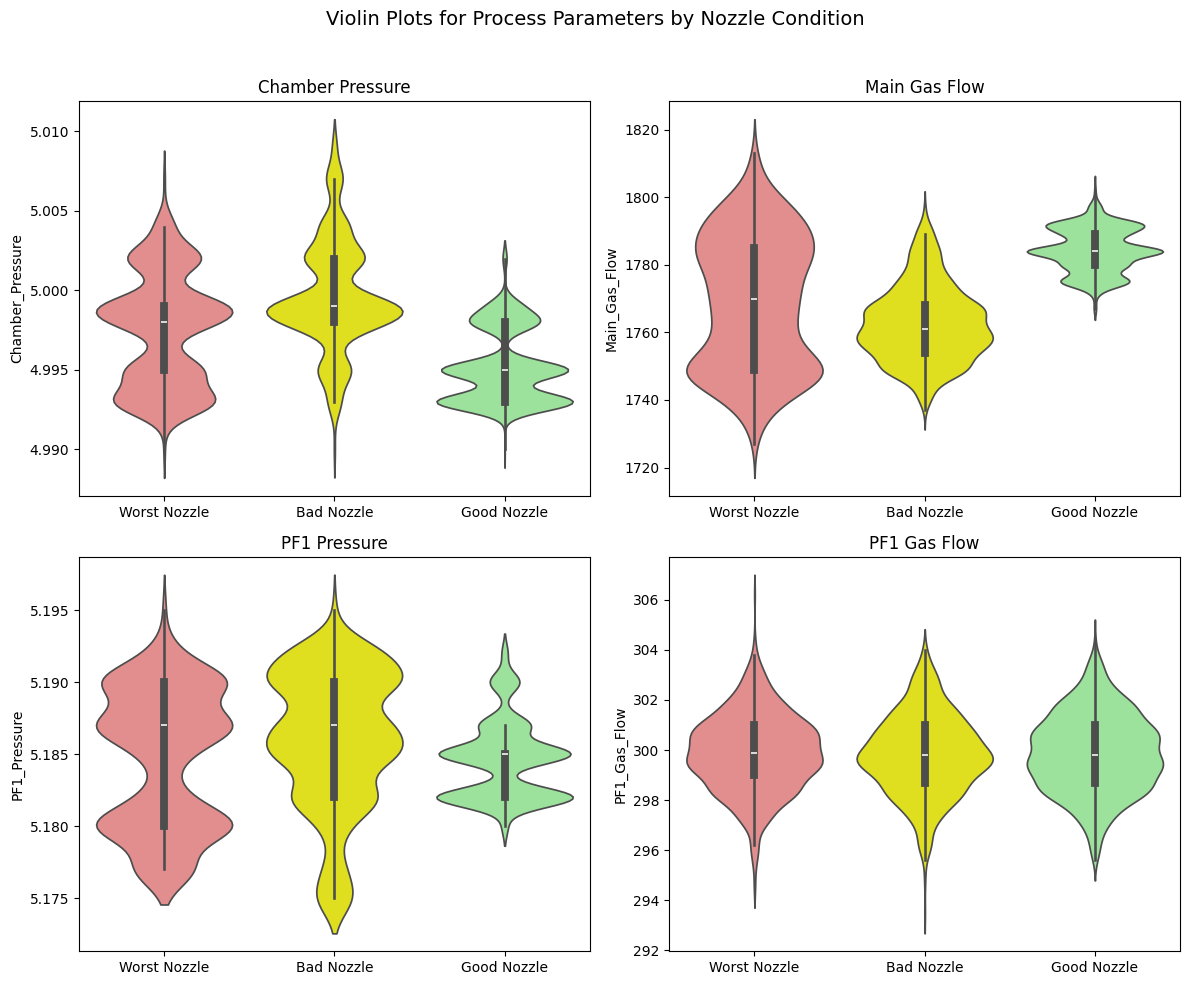

In [8]:
# Set up the figure and axes for 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Violin Plots for Process Parameters by Nozzle Condition", fontsize=14)

# Plot each parameter in a subplot
for ax, param, title in zip(axes.flatten(), pros_param, titles):
    sns.violinplot(x="Nozzle_Condition", y=param, data=df, ax=ax, order=[0, 0.5, 1], palette=['lightcoral', 'yellow', 'lightgreen'])
    
    # Set custom x-axis labels
    ax.set_title(title)
    ax.set_xticks([0, 1, 2])  # Ensure tick positions are set correctly
    ax.set_xticklabels(['Worst Nozzle', 'Bad Nozzle', 'Good Nozzle', ])  # Set custom labels
    ax.set_xlabel("")  # Remove default x-axis label
    ax.set_ylabel(param)  # Set y-axis label for each plot

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect for the main title
# plt.savefig(f"../graphs/Violin.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

### Statistical Moments and Significance

### Mathematical Equations

1. **Mean (average amplitude)**:  
   $p_1 = \frac{1}{k} \sum_{i=1}^k s(i)$  
   - Represents the **average value** of the signal over $k$ samples.

2. **Variance (standard deviation)**:  
   $p_2 = \left( \frac{\sum_{i=1}^k (s(i) - p_1)^2}{k-1} \right)^{1/2}$  
   - Measures the **spread** or variability of the signal around the mean.

3. **Root-Mean-Square (RMS) amplitude**:  
   $p_3 = \left( \frac{1}{k} \sum_{i=1}^k s(i)^2 \right)^{1/2}$  
   - Represents the **effective magnitude** of the signal, emphasizing larger values.

4. **Square of Mean of Rooted Absolute Amplitude (SMRA)**:  
   $p_4 = \left( \frac{1}{k} \sum_{i=1}^k \sqrt{|s(i)|} \right)^2$  
   - Captures the **average rooted absolute amplitude** and squares it for weighting.

5. **Skewness Coefficient**:  
   $p_6 = \frac{\sum_{i=1}^k \left( s(i) - p_1 \right)^3}{(k-1) p_2^3}$  
   - Measures the **asymmetry** of the signal distribution.  
     - Positive skew: tail on the right.  
     - Negative skew: tail on the left.

6. **Kurtosis Coefficient**:  
   $p_7 = \frac{\sum_{i=1}^k \left( s(i) - p_1 \right)^4}{(k-1) p_2^4}$  
   - Measures the **tailedness** of the signal distribution.  
     - High kurtosis: sharp peak, heavy tails.  
     - Low kurtosis: flat peak, light tails.

7. **t-Test for Mean Difference**:  
   The **t-test** evaluate whether two groups differ from each other:  

   $t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$

   Where:  
   - $\bar{x}_1$, $\bar{x}_2$: Sample means of two groups.  
   - $s_1^2$, $s_2^2$: Sample variances of two groups.  
   - $n_1$, $n_2$: Sample sizes of the two groups.  

   - **Null Hypothesis $( H_0 )$**: There is no significant difference between 2 groups.  
   - If the **p-value** is less than 0.05, we reject **$( H_0 )$**, indicating a **significant difference** between the groups.

---

### Legend:
- $p_1$: Mean (average value of the signal).  
- $p_2$: Standard deviation (square root of variance).  
- $p_3$: Root-Mean-Square amplitude.  
- $p_4$: Square of the mean of rooted absolute amplitudes.  
- $p_6$: Skewness coefficient (measures asymmetry of the signal).  
- $p_7$: Kurtosis coefficient (measures tailedness of the signal).  
- $k$: Total number of samples.  
- $s(i)$: Value of the signal at the $i$-th sample.  
- $t$: t-test statistic.  
- $\bar{x}_1$, $\bar{x}_2$: Sample means of two groups.  
- $s_1^2$, $s_2^2$: Sample variances.  
- $n_1$, $n_2$: Sample sizes.


In [9]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway

pros_param = ["Chamber_Pressure", "Main_Gas_Flow", "PF1_Pressure", "PF1_Gas_Flow"]

# Function to calculate metrics
def calculate_metrics(data):
    p1 = np.mean(data)  # Mean
    p2 = np.sqrt(np.var(data, ddof=1))  # Variance (std deviation)
    p3 = np.sqrt(np.mean(np.square(data)))  # RMS
    p4 = np.square(np.mean(np.sqrt(np.abs(data))))  # SMRA
    p6 = np.sum(((data - p1) ** 3)) / ((len(data) - 1) * (p2 ** 3))  # Skewness
    p7 = np.sum(((data - p1) ** 4)) / ((len(data) - 1) * (p2 ** 4))  # Kurtosis
    return p1, p2, p3, p4, p6, p7

# Create an empty list to store the results
metrics_list = []

# Loop through each process parameter and calculate metrics
for param in pros_param:
    # Separate data for each nozzle condition (0, 0.5, 1)
    worst_data = df[df['Nozzle_Condition'] == 0][param]
    bad_data = df[df['Nozzle_Condition'] == 0.5][param]
    good_data = df[df['Nozzle_Condition'] == 1][param]

    # Calculate metrics for each nozzle condition
    p1_worst, p2_worst, p3_worst, p4_worst, p6_worst, p7_worst = calculate_metrics(worst_data)
    p1_bad, p2_bad, p3_bad, p4_bad, p6_bad, p7_bad = calculate_metrics(bad_data)
    p1_good, p2_good, p3_good, p4_good, p6_good, p7_good = calculate_metrics(good_data)

    # Perform ANOVA test
    f_stat, p_value = f_oneway(worst_data, bad_data, good_data)

    if p_value < 0.05:
        anova_result = 1  # Significant difference
    else:
        anova_result = 0  # No significant difference

    # Append metrics to the list
    metrics_list.append({
        "Parameter": param,
        "Mean_Worst": p1_worst,
        "Variance_Worst": p2_worst,
        "RMS_Worst": p3_worst,
        "SMRA_Worst": p4_worst,
        "Skewness_Worst": p6_worst,
        "Kurtosis_Worst": p7_worst,
        "Mean_Bad": p1_bad,
        "Variance_Bad": p2_bad,
        "RMS_Bad": p3_bad,
        "SMRA_Bad": p4_bad,
        "Skewness_Bad": p6_bad,
        "Kurtosis_Bad": p7_bad,
        "Mean_Good": p1_good,
        "Variance_Good": p2_good,
        "RMS_Good": p3_good,
        "SMRA_Good": p4_good,
        "Skewness_Good": p6_good,
        "Kurtosis_Good": p7_good,
        "ANOVA_Result": anova_result,  # Significant or not
        "ANOVA_p_value": p_value      # ANOVA p-value
    })

# Convert the results into a DataFrame
metrics_df = pd.DataFrame(metrics_list)
# metrics_df.to_csv("Metrics_ANOVA.csv")
metrics_df


,Parameter,Mean_Worst,Variance_Worst,RMS_Worst,SMRA_Worst,Skewness_Worst,Kurtosis_Worst,Mean_Bad,Variance_Bad,RMS_Bad,...,Skewness_Bad,Kurtosis_Bad,Mean_Good,Variance_Good,RMS_Good,SMRA_Good,Skewness_Good,Kurtosis_Good,ANOVA_Result,ANOVA_p_value
0,Chamber_Pressure,4.997527,0.003473,4.997528,4.997526,0.129738,1.970082,4.999679,0.003418,4.999680,...,0.362767,3.268959,4.995171,0.002224,4.995172,4.995171,0.734112,2.539959,1,1.515288e-178
1,Main_Gas_Flow,1768.847778,19.560014,1768.955802,1768.793777,0.055833,1.835434,1762.738889,11.168924,1762.774233,...,0.458459,2.819497,1784.364444,6.398559,1784.375904,1784.358714,-0.069438,2.329663,1,6.692846e-220
2,PF1_Pressure,5.184653,0.004774,5.184656,5.184652,-0.139595,1.668644,5.185956,0.004784,5.185958,...,-0.629800,2.734583,5.184590,0.002665,5.184591,5.184590,0.719517,2.974293,1,8.882764e-14
3,PF1_Gas_Flow,299.896111,1.559155,299.900160,299.894087,-0.026968,3.249693,299.818778,1.604101,299.823064,...,-0.058006,3.112071,299.867556,1.578158,299.871704,299.865482,0.026918,2.653038,0,5.764965e-01
